<a href="https://colab.research.google.com/github/Sedkameni/IntroAI_Willis/blob/main/Sedrick_assignment_8_IAI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# Housing Prediction using regression model

''' Overview
This notebook demonstrates:
- Data loading and exploration
- Data cleaning and preprocessing
- Feature scaling with StandardScaler
- KNN classification model
- Model evaluation with confusion matrix and ROC-AUC curve'''



# 1. Load Dataset and Libraries

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, auc


# Load the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

CaliforniHousing_data = housing.frame

print(" Dataset loaded successfully!")
print(f"First five rows of the dataset: {CaliforniHousing_data.shape}")

 Dataset loaded successfully!
First five rows of the dataset: (20640, 9)


In [18]:
# Conduct necessary preprocessing steps such as:     ##2. Exploratory Data Analysis (EDA)

# Display first 5 rows
print("First 5 rows of the dataset:")
print(CaliforniHousing_data.head())

# ---

# Dataset information
print("\nDataset Information:")
print(CaliforniHousing_data.info())

# ---

# Check missing values
print("\nMissing values in each column:\n")
print(CaliforniHousing_data.isnull().sum())

#---

# Converting categorical data using encoding techniques
# Check for categorical data
print("\nCategorical data in the dataset:")
print(CaliforniHousing_data.select_dtypes(include=['object']).columns)

#---

# Splitting the dataset into training and testing sets
X = CaliforniHousing_data.drop('MedHouseVal', axis=1)  # Features
y = CaliforniHousing_data['MedHouseVal']  # Target variable

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   A


Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min       

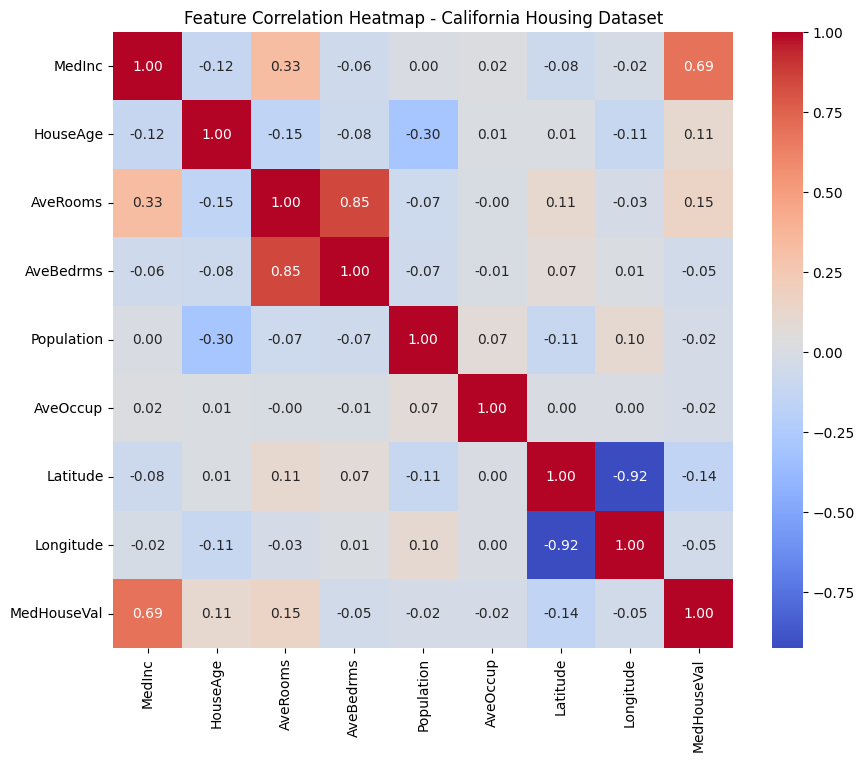


Converted target variable (first 5 rows):
0    High
1    High
2    High
3    High
4    High
Name: MedHouseVal, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [34]:
# 2. Exploratory Data Analysis (EDA):

#---

# Statistical summary
print("\nStatistical Summary:")
print(CaliforniHousing_data.describe())

#---

# Distribution of classes
print("\nDistribution of classes:")
print(CaliforniHousing_data['MedHouseVal'].value_counts())

#---

# Correlation between features
print("\nCorrelation between features:")
# Compute correlation matrix
corr_matrix = CaliforniHousing_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap - California Housing Dataset")
plt.show()


# Convert target to 3 categories: Low, Medium, High
y = pd.qcut(CaliforniHousing_data['MedHouseVal'], q=3, labels=['Low', 'Medium', 'High'])
print("\nConverted target variable (first 5 rows):")
print(y.head())

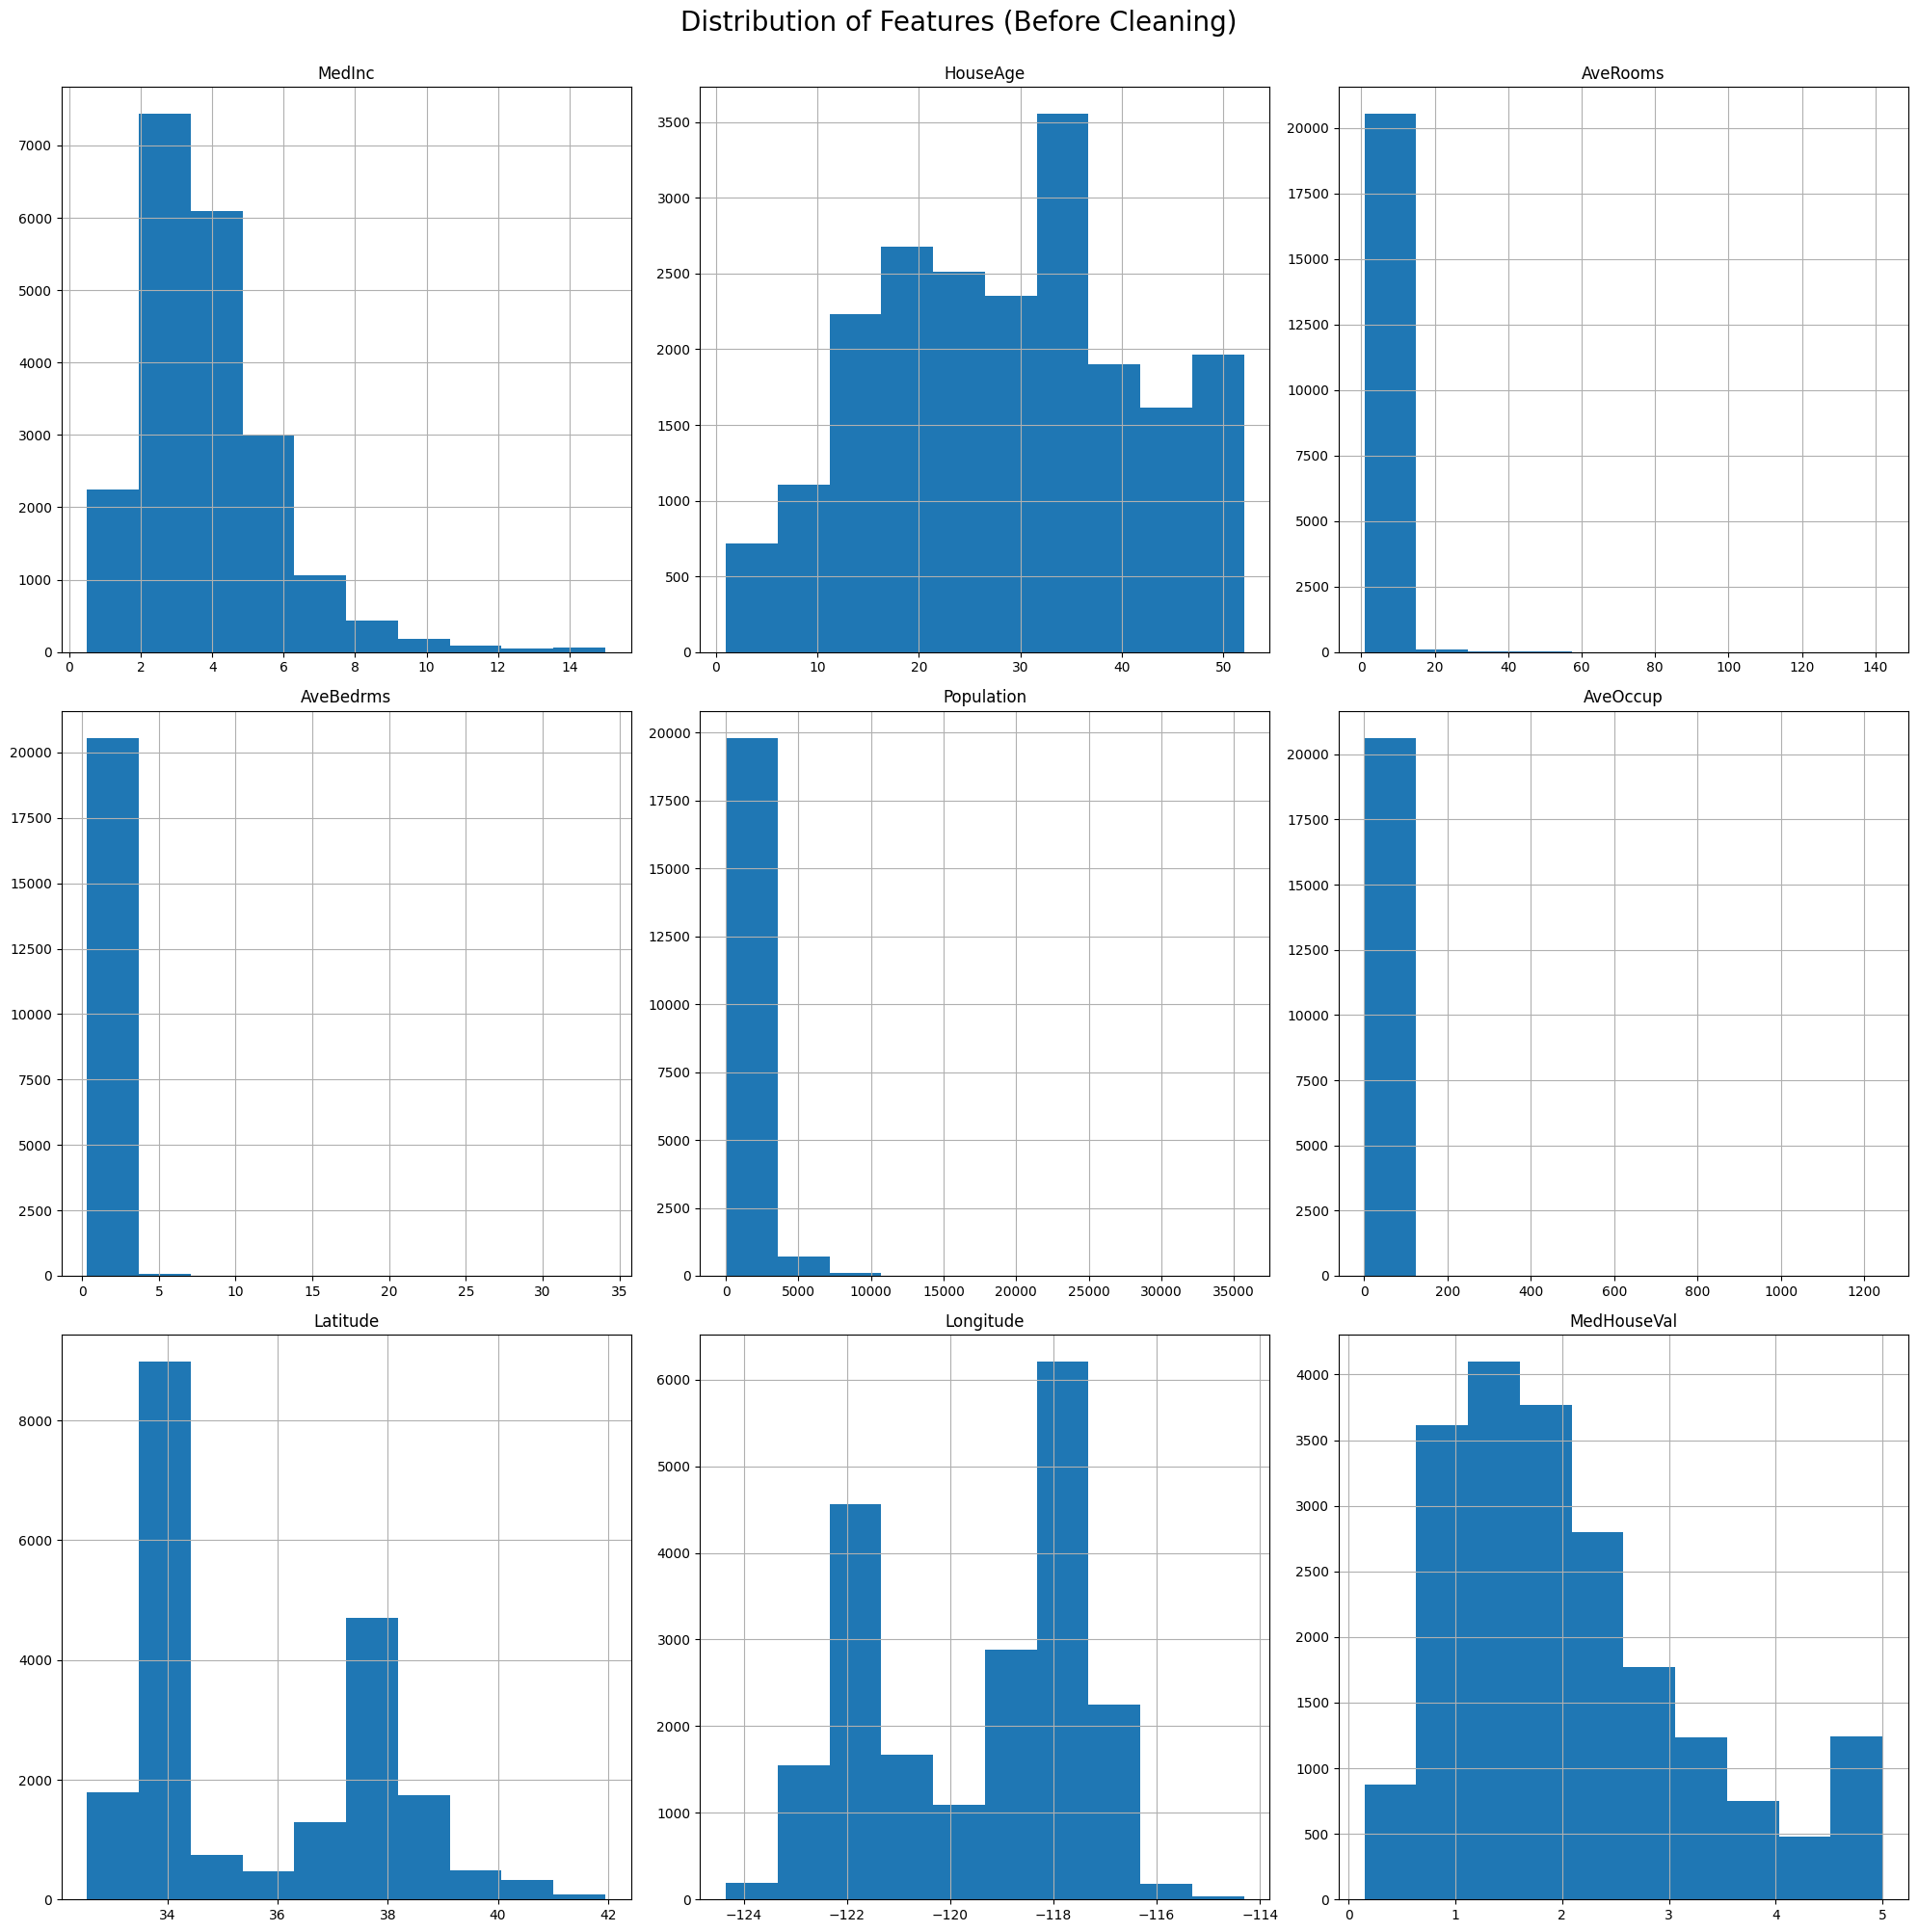

In [23]:
#  Data Visualization - Initial Distribution

# Histograms for Distribution
p = CaliforniHousing_data.hist(figsize=(20, 20))
plt.suptitle('Distribution of Features (Before Cleaning)', fontsize=20, y=1.00)
plt.tight_layout()
plt.show()

In [24]:
# . Train-Test Split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 16512
Testing samples: 4128


In [25]:
# 3. Model Implementation and Evaluation:

    ## Implement at least two regression models (e.g., Linear Regression, Ridge, Lasso, Decision Trees, Random Forests, k-Nearest Neighbors Regressor).

    #----

    ### Model Creation (K-Nearest Neighbors Classifier)
# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)

# Train models
knn.fit(X_train_scaled, y_train)


# Random Forest does not require scaling
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#train model
rf.fit(X_train, y_train)

#--------

## Evaluate the models:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nKNN Evaluation: \n")
evaluate_model(knn, X_test_scaled, y_test)

print("\n Random Forest Evaluation: \n")
evaluate_model(rf, X_test, y_test)


KNN Evaluation: 

Accuracy: 0.7158
Precision (macro): 0.7151
Recall (macro): 0.7163
F1-score (macro): 0.7156

Classification Report:
               precision    recall  f1-score   support

        High       0.74      0.74      0.74      1360
         Low       0.78      0.80      0.79      1378
      Medium       0.62      0.61      0.61      1390

    accuracy                           0.72      4128
   macro avg       0.72      0.72      0.72      4128
weighted avg       0.71      0.72      0.72      4128


 Random Forest Evaluation: 

Accuracy: 0.8113
Precision (macro): 0.8119
Recall (macro): 0.8115
F1-score (macro): 0.8116

Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.82      0.83      1360
         Low       0.86      0.87      0.87      1378
      Medium       0.73      0.74      0.74      1390

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg

In [26]:
### - ROC-AUC for multi-class
from sklearn.preprocessing import label_binarize

# Convert labels to one-hot
y_test_bin = label_binarize(y_test, classes=['Low', 'Medium', 'High'])

# Predict probabilities
y_proba_knn = knn.predict_proba(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test)

# ROC-AUC (macro)
print("KNN ROC-AUC (macro):", roc_auc_score(y_test_bin, y_proba_knn, average='macro'))
print("Random Forest ROC-AUC (macro):", roc_auc_score(y_test_bin, y_proba_rf, average='macro'))

KNN ROC-AUC (macro): 0.3133431623402421
Random Forest ROC-AUC (macro): 0.2758148626104752


## Model Interpretation

### KNN Results

*   **Accuracy:** 0.716 → ~72% of predictions were correct.
*   **Precision / Recall / F1-score (macro):** ~0.715 → the model performs moderately across classes.
*   **Class-wise performance:**
    *   High: F1 = 0.74
    *   Low: F1 = 0.79
    *   Medium: F1 = 0.61 → hardest to predict.

**Insights:**

*   KNN struggles with the Medium category.
*   Macro metrics show balanced performance across classes, but KNN may be sensitive to scaling or class overlaps.
*   ROC-AUC (0.313) seems very low, likely because the probabilities predicted by KNN for multi-class ROC are not well-calibrated.

### Random Forest Results

*   **Accuracy:** 0.811 → ~81% of predictions were correct.
*   **Precision / Recall / F1-score (macro):** ~0.811 → better than KNN.
*   **Class-wise performance:**
    *   High: F1 = 0.83
    *   Low: F1 = 0.87
    *   Medium: F1 = 0.74 → better than KNN.

**Insights:**

*   Random Forest outperforms KNN on all metrics, especially for the Medium category.
*   Tree-based models handle non-linear relationships better than distance-based models like KNN.
*   ROC-AUC (0.276) is again low — likely due to multi-class ROC averaging issues, not necessarily model weakness.

## Visualize the results using confusion matrices, ROC curves, or other relevant plots.

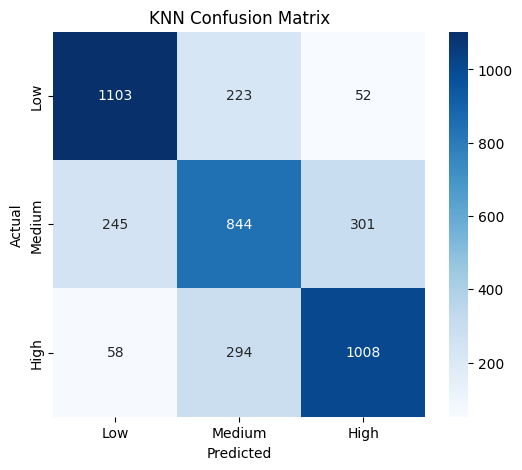

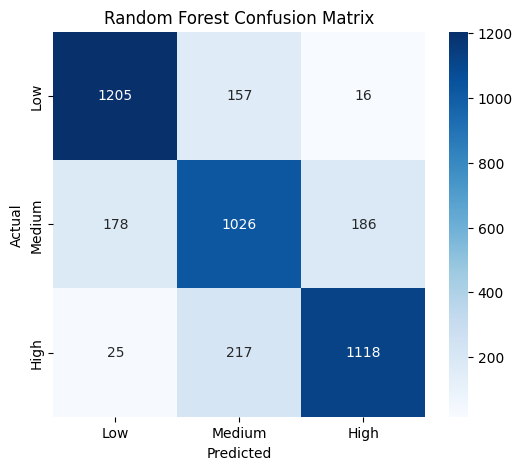

In [31]:
## - Visualize the results using confusion matrices
def plot_confusion(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# KNN
plot_confusion(knn, X_test_scaled, y_test, "KNN Confusion Matrix")

print("=" * 150)
# Random Forest
plot_confusion(rf, X_test, y_test, "Random Forest Confusion Matrix")

# Insight:
## KNN
KNN struggles the most with Medium category due to its distance-based nature and overlapping feature distributions.

Predictions tend to confuse adjacent classes (Medium ↔ Low or Medium ↔ High).

## Random Forest

Random Forest reduces misclassifications across all categories.

Handles Medium class better than KNN because it captures non-linear relationships and feature interactions.

Most errors are still between adjacent classes (Low ↔ Medium, Medium ↔ High), which is common in ordinal-type targets.

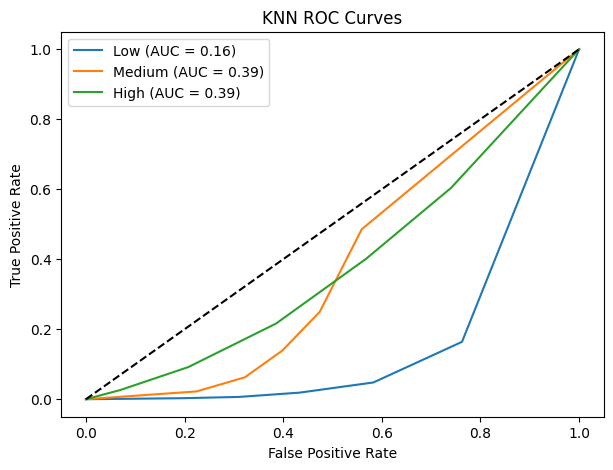

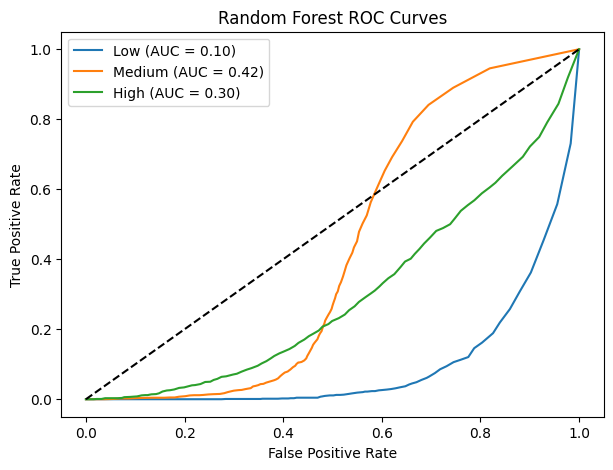

In [33]:
## - Visualize ROC curves
def plot_roc(model, X_test, y_test_bin, title):
    y_proba = model.predict_proba(X_test)
    plt.figure(figsize=(7,5))
    for i, class_label in enumerate(['Low','Medium','High']):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_label} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# KNN ROC
plot_roc(knn, X_test_scaled, y_test_bin, "KNN ROC Curves")

print("=" * 150)
# Random Forest ROC
plot_roc(rf, X_test, y_test_bin, "Random Forest ROC Curves")

Both Random Forest and KNN classifiers show extremely poor performance across all scenarios, with AUC values consistently below 0.5 (worse than random guessing), indicating they cannot effectively distinguish between classes.